In [1]:
#from TwitterAPI import TwitterAPI
import json
import twitter
import time
import string
from nltk.corpus import words
import io
import numpy as np
from IPython.display import display
import plotly.tools as tls
import pandas as pd

import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout

# Authorization
CONSUMER_KEY = 'IZDwVjCfCnJjxIuggunDJxJom'
CONSUMER_SECRET = 'z2ZKVV0CnQpsShj48JOZbGedoRviDMrIGcb9eV74foKrmdGPEL'
ACCESS_TOKEN_KEY = '771636955041804288-if5bTd39lfygmHYUvu9Rasd8dto1UwA'
ACCESS_TOKEN_SECRET = '4VfUZ9Lhl2OQ3jGYmzJMMz0wlfuyzD4n0RBlM3P8QZMv9'


auth = twitter.oauth.OAuth(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth,retry=True)


        

In [2]:
cuisines=['irish cuisine', 'mexican cuisine', 'chinese cuisine', 'filipino cuisine', 'vietnamese cuisine', 'moroccan cuisine', 'brazilian cuisine', 'japanese cuisine', 'british cuisine', 'greek cuisine', 
          'indian cuisine', 'jamaican cuisine', 'french cuisine','spanish cuisine', 'russian cuisine', 'cajun_creole cuisine', 'thai cuisine', 'american cuisine', 'korean cuisine', 'italian cuisine']

dict_tweets= {c:[] for c in cuisines} # Dictionary (keys: type of cuisines and values: tweets )

In [ ]:
for cui in cuisines:
    SEARCH_TERM = cui
    count=200

    results = twitter_api.search.tweets(q = SEARCH_TERM,count=count)
    statuses = results['statuses']

    print cui.upper()
    l=len(statuses)
    print ("We have %d statuses" %l)

    for i in range (0,15):
        for _ in range(5):
            try:
                next_results = results['search_metadata']['next_results']
            except KeyError, e: # No more results when next_results doesn't exist
                break

        # Create a dictionary from next_results, which has the following form:

        kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
        results = twitter_api.search.tweets(**kwargs )
        statuses += results['statuses']

        l=len(statuses)
        print ("We have %d statuses" %l)

        # Show one sample search result by slicing the list...
        tweets=[] # List of tweets per cuisine

        for status in statuses:
            j=json.dumps(status['text'], indent=1)
            tweets.append(j)


    dict_tweets[cui].extend(tweets)
    #print ("Finished printing %s with %i comments " %(cui,l ))


In [ ]:
# save to file:
#with open('tweetsfile.json', 'w') as f:
    #json.dump(dict_tweets, f)


In [15]:
from collections import Counter

cnt=Counter()
for tweet in dict_tweets['mexican cuisine']:
    cnt[tweet]+=1
print cnt

Counter({'"RT @sabores_CDMX: Chef @manolopitiona of @AguamielMx will bring the tradition of Mexican cuisine from #CDMX to #Vancouver. Enjoy #MexicoCit\\u2026"': 10, '"RT @e_chefsrecipes: Recipe contents page by cuisine type:\\n\\nhttps://t.co/eE0rwBnfUk\\n\\n#Malay #Thai #Indian #Mexican #Italian #Spanish #Scotti\\u2026"': 10, '"RT @SugarandRiceMag: Great essay by @LuvFoodAndMedia =&gt; Beyond Tex-Mex: Rediscovering Texas\\u2019 10,000-Year-Old Cuisine: https://t.co/PoG0T30z\\u2026"': 10, '"RT @LatinosHadleigh: Visit Latino\'s today and experience the finest #Spanish #Mexican and #Portuguese cuisine in Essex. #Tapas #Benfleet ht\\u2026"': 8, '"RT @one_emporio: Proud to work together . @MexlyFusion . Fusion Italiano &amp; Mexican cuisine . #comingsoon #restaurants #newopenings @NewOpen\\u2026"': 6, '"RT @JumiaFoodRW: Ever tried Mexican cuisine? No? Then you should try Meze Fresh\'s Quesadillas at only 3,000 Frw with a Free delivery! https\\u2026"': 6, '"RT @WildHibiscusCo: Hibis-kiss to

In [16]:
print len(dict_tweets['korean cuisine'])

1304


In [ ]:
from stop_words import get_stop_words

stop_words = get_stop_words('en')

## --------------------------------CLEANING TWEETS--------------------------------------##

In [4]:
with open('tweetsfile.json', 'r') as f:
    data = json.load(f)

In [5]:
print data['brazilian cuisine'][:3]

[u'"Stop by #Wildfire &amp; do try our authentic #Brazilian cuisine cooked with love by Chef Juarez G de Azevedo!\\u2026 https://t.co/p9pvvDngXA"', u'"eating Brazilian cuisine at Fogo de Ch\\u00e3o https://t.co/gognWzBa7T"', u'"4 words - Chu rras que ria \\ud83d\\ude0d \\u2014 eating Brazilian cuisine at Fogo de Ch\\u00e3o https://t.co/TRBWKZTwwT"']


In [5]:
data['brazilian cuisine'][0].replace("'", "")
data['brazilian cuisine'][0] = ''.join(ch for ch in data['brazilian cuisine'][0] if ch not in exclude)

data['brazilian cuisine'][0]

NameError: global name 'exclude' is not defined

In [6]:
exclude = set(string.punctuation)
data_clean={c:[] for c in cuisines} 
english_words = set(words.words())
data_tokens={c:[] for c in cuisines}


for cui in data_clean.keys():
    tweet_clean=[]
    tokens=[]
    print cui
    for tweet in data[cui]:
        tweet.replace("'", "")
        tweet = ''.join(ch for ch in tweet if ch not in exclude)
        tweet=[word for word in tweet.split() if word in english_words]
        tokens.extend(tweet)
    data_tokens[cui].extend(tokens)
print data_tokens['brazilian cuisine']

brazilian cuisine
mexican cuisine
irish cuisine
italian cuisine
french cuisine
chinese cuisine
vietnamese cuisine
jamaican cuisine
british cuisine
greek cuisine
filipino cuisine
japanese cuisine
korean cuisine
moroccan cuisine
spanish cuisine
cajun_creole cuisine
american cuisine
thai cuisine
indian cuisine
russian cuisine
[u'by', u'do', u'try', u'our', u'authentic', u'Brazilian', u'cuisine', u'with', u'love', u'by', u'G', u'de', u'eating', u'Brazilian', u'cuisine', u'at', u'de', u'ria', u'eating', u'Brazilian', u'cuisine', u'at', u'de', u'de', u'recipe', u'Brazilian', u'us', u'tonight', u'at', u'and', u'enjoy', u'all', u'your', u'favorite', u'Brazilian', u'us', u'tonight', u'at', u'and', u'enjoy', u'all', u'your', u'favorite', u'Brazilian', u'Os', u'da', u'os', u'eating', u'Brazilian', u'cuisine', u'at', u'Brazilian', u'Brazilian', u'and', u'for', u'or', u'at', u'to', u'whats', u'the', u'best', u'Brazilian', u'cuisine', u'recipe', u'book', u'available', u'in', u'English', u'with', u'o

In [7]:
#with open('tokensfile.json', 'w') as f:
    #json.dump(data_tokens, f)

## -------------------------------------- SENTIMENT ANALYSIS----------------------------------------------------- ##

In [34]:
f = io.open('Data_Set_S1.txt','r', encoding='utf-8')
data = f.read()
f.close()

In [48]:
# load average hapiness
sentiment_dict = {}
for line in (data.split('\n'))[1:-1]:
    try:
        sentiment_dict[line.split()[0]] = float(line.split()[2])
    except:
        print line
        raise

In [50]:
print sentiment_dict['happiness']

8.44


In [55]:
def sentiments(tokens, sentiment_dict):
    sent_list = [sentiment_dict[token] for token in tokens if token in sentiment_dict]
    
    if len(sent_list) == 0:
        print "The list has no sentimens... :_("
        return -1
    else:
        return float(np.mean(sent_list))


In [58]:
average_sent={c:'' for c in cuisines}

for cui in cuisines:
    sentiment=sentiments(data_tokens[cui], sentiment_dict)
    average_sent[cui]=round(sentiment,2)
print average_sent

{'brazilian cuisine': 5.66, 'mexican cuisine': 5.6, 'irish cuisine': 5.68, 'italian cuisine': 5.58, 'french cuisine': 5.66, 'chinese cuisine': 5.74, 'vietnamese cuisine': 5.66, 'jamaican cuisine': 5.65, 'british cuisine': 5.45, 'greek cuisine': 5.6, 'filipino cuisine': 5.61, 'japanese cuisine': 5.62, 'korean cuisine': 5.57, 'moroccan cuisine': 5.65, 'spanish cuisine': 5.54, 'cajun_creole cuisine': 5.71, 'american cuisine': 5.0, 'thai cuisine': 5.7, 'indian cuisine': 5.68, 'russian cuisine': 5.68}


In [59]:
with open('sentimentfile.json', 'w') as f:
    json.dump(average_sent, f)

In [65]:
cocinas=[]
for key in average_sent.keys():
    cocinas.append(key[:-7])
print cocinas

['brazilian ', 'mexican ', 'irish ', 'italian ', 'french ', 'chinese ', 'vietnamese ', 'jamaican ', 'british ', 'greek ', 'filipino ', 'japanese ', 'korean ', 'moroccan ', 'spanish ', 'cajun_creole ', 'american ', 'thai ', 'indian ', 'russian ']


In [70]:
py.iplot({'data':[Bar(x=cocinas, y=average_sent.values())],
          'layout':Layout(barmode='stack', xaxis= {'tickangle': 40},yaxis={'range':[4.9,5.7]}, title='Sentiment per Cuisine')} ,
         filename='Sentiment per Cuisine')

In [71]:
py.iplot({'data':[Bar(x=cocinas, y=average_sent.values())],
          'layout':Layout(barmode='stack', xaxis= {'tickangle': 40},yaxis={'range':[5.4,5.7]}, title='Sentiment per Cuisine')} ,
         filename='Sentiment per Cuisine')

In [76]:

cod = pd.read_csv('country.csv')


data = [ dict(
        type = 'choropleth',
        locations = cod['CODE'],
        z = average_sent.values(),
        text = cod['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = 'Grade of Happiness'),
      ) ]

layout = dict(
    title = 'Happiness av. per cuisinein the World',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

# ------------------------------------WORD CLOUD------------------------------------------------------

In [47]:
# create a word count for each word in each cuisine
wordcount_cui = []
#For each cuisine in data_tokens
for cuisine in data_tokens.keys():
    #we create a wordset for each cuisine
    wordset = list(set(data_tokens[cuisine]))
    #Construct a dict with the set of tokens as keys and 0 as values
    word_dict = dict.fromkeys(wordset, 0)
    #we add +1 to the value each time a word appears in the tokens
    for word in data_tokens[cuisine]:
        word_dict[word]+=1
    wordcount_cui.append(word_dict) 

In [48]:
wordcount_cui 

[{u'A': 12,
  u'Aberdeen': 2,
  u'African': 12,
  u'Andhra': 16,
  u'Anthony': 12,
  u'Art': 16,
  u'Arthur': 16,
  u'Asian': 160,
  u'Ben': 48,
  u'Benton': 10,
  u'Birmingham': 2,
  u'Brandon': 32,
  u'Brazilian': 182,
  u'Bryan': 2,
  u'Chester': 4,
  u'Chinese': 18,
  u'Clay': 16,
  u'Delicious': 16,
  u'Don': 16,
  u'E': 2,
  u'English': 4,
  u'Francisco': 32,
  u'Frederick': 16,
  u'French': 34,
  u'G': 4,
  u'Hollywood': 2,
  u'I': 62,
  u'Indian': 2,
  u'Indonesian': 48,
  u'Italian': 4,
  u'Japanese': 18,
  u'Khmer': 16,
  u'Korean': 34,
  u'Lebanese': 2,
  u'Louis': 18,
  u'Luke': 16,
  u'Malaysian': 32,
  u'Mexican': 16,
  u'Monday': 4,
  u'Mongolian': 2,
  u'Old': 16,
  u'Olympic': 4,
  u'Os': 2,
  u'Part': 16,
  u'Philip': 16,
  u'Portuguese': 2,
  u'Quixote': 16,
  u'Root': 2,
  u'San': 32,
  u'Sarah': 16,
  u'Spanish': 2,
  u'Spring': 16,
  u'Texas': 6,
  u'Thai': 84,
  u'The': 68,
  u'Think': 16,
  u'Turkey': 64,
  u'Vietnamese': 1120,
  u'William': 16,
  u'a': 176,
  u

In [49]:
print len(wordcount_cui)
print data_tokens.keys()[:6]

20
['brazilian cuisine', 'mexican cuisine', 'irish cuisine', 'italian cuisine', 'french cuisine', 'chinese cuisine']


In [50]:
#we create the TF function
def TF(word_dict):
    #we create a dict to store the TF
    tfdict = {}
    #we iterate and compute TF
    for word, count in word_dict.iteritems():
        tfdict[word] = 1 + np.log(count)
    return tfdict

#initializa a list for TF per cuisine
TF_cuisine = []
#We append TF for each cuisine
for index in xrange(len(data_tokens)):
    word_dict = wordcount_cui[index]
    tf = TF(word_dict)
    TF_cuisine.append(tf)

In [51]:
print (TF_cuisine)

[{u'Sarah': 3.7725887222397811, u'summer': 3.7725887222397811, u'all': 4.0910424533583161, u'serving': 1.6931471805599454, u'just': 3.9957322735539909, u'less': 1.6931471805599454, u'photo': 3.7725887222397811, u'over': 1.6931471805599454, u'recipe': 5.2484952420493594, u'by': 2.3862943611198908, u'discovered': 3.7725887222397811, u'paper': 4.465735902799727, u'dish': 4.465735902799727, u'whats': 2.3862943611198908, u'chicken': 4.5263605246161616, u'still': 3.7725887222397811, u'find': 1.6931471805599454, u'Texas': 2.791759469228055, u'unique': 1.6931471805599454, u'yummy': 3.7725887222397811, u'comfort': 4.465735902799727, u'la': 1.6931471805599454, u'had': 4.465735902799727, u'amazing': 1.6931471805599454, u'French': 4.5263605246161616, u'actually': 4.465735902799727, u'better': 3.8903717578961645, u'to': 6.3278761687895813, u'finally': 1.6931471805599454, u'interested': 3.7725887222397811, u'choose': 1.6931471805599454, u'sorry': 4.465735902799727, u'holiday': 1.6931471805599454, u'

In [52]:
#We test with the first few cuisines (the order of the cuisines is above)
df_TF = pd.DataFrame({  
    'Brazilian' : sorted(TF_cuisine[0].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Mexican' : sorted(TF_cuisine[1].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Irish' : sorted(TF_cuisine[2].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Italian' : sorted(TF_cuisine[3].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'French' : sorted(TF_cuisine[4].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Chinese' : sorted(TF_cuisine[5].items(), key=lambda x: (-x[1], x[0]))[0:5]
    })

In [53]:
df_TF

,Brazilian,Chinese,French,Irish,Italian,Mexican
0,"(Vietnamese, 8.02108396429)","(Chinese, 6.90808293817)","(French, 6.57972982599)","(Italian, 6.18178355029)","(Italian, 7.58063913728)","(Mexican, 6.84064165737)"
1,"(cuisine, 7.62539236801)","(cuisine, 6.57594910315)","(cuisine, 6.32300997914)","(cuisine, 5.86753445046)","(cuisine, 6.74300318781)","(cuisine, 6.22574667371)"
2,"(in, 6.76205138278)","(in, 6.51342874616)","(and, 5.67282883446)","(Irish, 5.62497281328)","(the, 6.66296048014)","(of, 5.54329478227)"
3,"(of, 6.74939298591)","(the, 6.28826703069)","(a, 5.60517018599)","(the, 5.47733681448)","(of, 6.38449506279)","(to, 5.33073334029)"
4,"(the, 6.62040086572)","(of, 6.20400668708)","(the, 5.54329478227)","(in, 5.38202663467)","(in, 6.13579843705)","(the, 5.27666611902)"


In [54]:
#we define the IDF function
def IDF(cuisine_num,idf_dict):
    #obtain the number of cuisines we have
    N = len(cuisine_num)
    #we compute IDF for each cuisine
    for cui in cuisine_num:
        for word, value in cui.iteritems():
            if value > 0:
                idf_dict[word] +=1
    for word, value in idf_dict.iteritems():
        idf_dict[word]= np.log(N / float(abs(value))) 
    return idf_dict

#we define the TF_IDF function
def TFIDF(tf, idfs):
    #create a dict to store TF_IDF
    tf_idf = {}
    #multiply TF and IDF for each word
    for word, val in tf.iteritems():
        tf_idf[word] = val * idfs[word]
    return tf_idf

#we create a dict with the words from each cuisine
dic = dict(wordcount_cui[0].items() + wordcount_cui[1].items() +  wordcount_cui[2].items() + 
           wordcount_cui[3].items() +  wordcount_cui[4].items() + wordcount_cui[5].items() +
           wordcount_cui[6].items() + wordcount_cui[7].items() +  wordcount_cui[8].items() +
           wordcount_cui[9].items() + wordcount_cui[10].items() +  wordcount_cui[11].items() +
           wordcount_cui[12].items() + wordcount_cui[13].items() +  wordcount_cui[14].items() +
           wordcount_cui[15].items() + wordcount_cui[16].items() +  wordcount_cui[17].items() +
           wordcount_cui[18].items() + wordcount_cui[19].items() )

#we initialize a dict with the words as keys an 0 as values
idf_dict = dict.fromkeys(dic.keys(),0)

#call the IDF function.
idfs = IDF(wordcount_cui,idf_dict)

#call the tf_IDF function for each cuisine
tfidf_x_cuisine = []
for cui in xrange(len(data_tokens)):
    tfidf =  TFIDF(TF_cuisine[cui], idfs)
    tfidf_x_cuisine.append(tfidf)

#as before, we can check the results for a few of them
df_TF = pd.DataFrame({  
    'Brazilian' : sorted(tfidf_x_cuisine[0].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Mexican' : sorted(tfidf_x_cuisine[1].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Irish' : sorted(tfidf_x_cuisine[2].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Italian' : sorted(tfidf_x_cuisine[3].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'French' : sorted(tfidf_x_cuisine[4].items(), key=lambda x: (-x[1], x[0]))[0:5],
    'Chinese' : sorted(tfidf_x_cuisine[5].items(), key=lambda x: (-x[1], x[0]))[0:5]
    })

In [55]:
df_TF

,Brazilian,Chinese,French,Irish,Italian,Mexican
0,"(Brazilian, 14.2852533145)","(unimagined, 18.3457565352)","(him, 10.9016414876)","(Irish, 16.8509125946)","(collection, 13.545652012)","(author, 13.1848090385)"
1,"(Benton, 9.89366074924)","(south, 13.9886046643)","(civilization, 9.89366074924)","(forth, 12.7561172229)","(spoil, 11.7301618475)","(Texas, 11.0160037331)"
2,"(pho, 8.30290202017)","(twice, 10.4398473211)","(deem, 9.89366074924)","(landscape, 12.7561172229)","(Israel, 11.3016657901)","(extravaganza, 10.9016414876)"
3,"(Anthony, 8.02429410228)","(age, 9.89366074924)","(essential, 9.89366074924)","(perspective, 12.7561172229)","(gem, 10.5539423811)","(essay, 10.4398473211)"
4,"(Ben, 7.83989558604)","(skill, 9.89366074924)","(manners, 9.89366074924)","(collection, 10.282736919)","(undiscovered, 10.5539423811)","(te, 10.4398473211)"


In [60]:
#define thee function to round the TF_IDF
def RoundTFIDF(tfidf_x_cuisine):
    #initialize the list to store it
    tfidf_cuisine_round = []
    for index in xrange(len(tfidf_x_cuisine)):
        tfidf_round = {}
        #For each cuisine
        for word,value in tfidf_x_cuisine[index].iteritems():
            #Round the TFIDF value
            tfidf_round[word] = int(round(value))
        tfidf_cuisine_round.append(tfidf_round)
    return tfidf_cuisine_round

#Call RoundTFIDF function
tfidf_cuisine_round = RoundTFIDF(tfidf_x_cuisine)

#Define LongString function
def LongString(tfidf_cuisine_round):
    #initialize the list to store it
    long_string_x_cui = []
    #For each cuisine
    for cui in xrange(len(tfidf_cuisine_round)):
        long_string_cui = []
        #For each cuisine
        for word,value in tfidf_cuisine_round[cui].iteritems():
            #If the rounded TF_IDF is bigger than 0 repeat the word value number of times
            if value > 0:
                long_string_cui.extend(np.repeat(word,value))
        #join them separated by space
        long_string_x_cui.append(' '.join(long_string_cui))
    return long_string_x_cui

#Call CreateLongString function
long_string_x_cui = LongString(tfidf_cuisine_round)

#Define WordCloud function
def Branch_WordCloud_mask(long_string_x_cui,cuisines):
    twitter_mask = imread('food-solid.png', flatten=True)

    #For each cuisine
    for index,cuisine in enumerate(cuisines):
        cuisine = cuisine.replace("_"," ")
        print cuisine
        #Generate WordCloud with longstring build above
        wordcloud = WordCloud(background_color='white').generate(long_string_x_cui[index])
        img=plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        #plt.savefig('wordcloud_%s.png' %name,dpi=1800)

brazilian cuisine


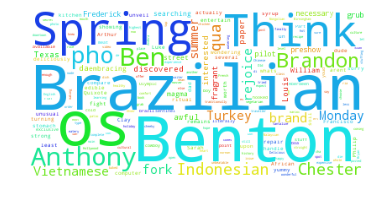

mexican cuisine


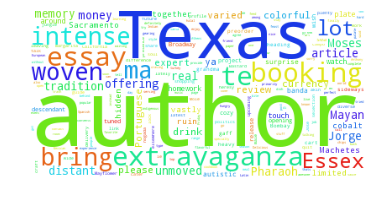

irish cuisine


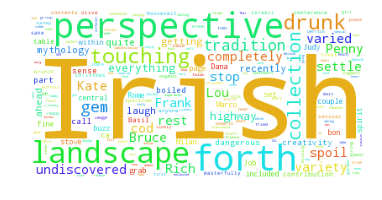

italian cuisine


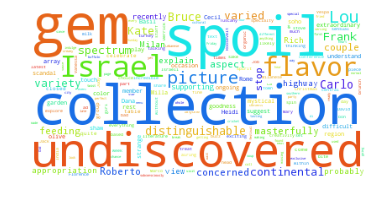

french cuisine


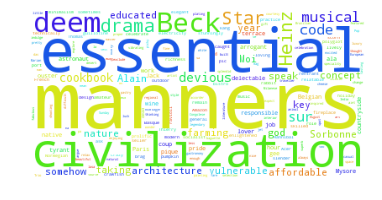

chinese cuisine


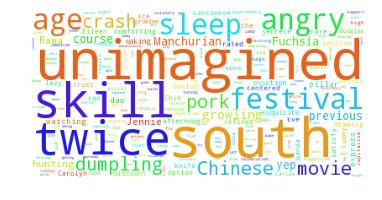

vietnamese cuisine


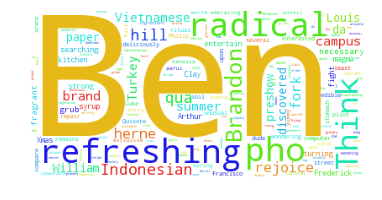

jamaican cuisine


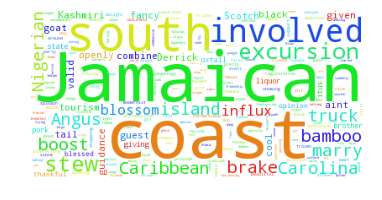

british cuisine


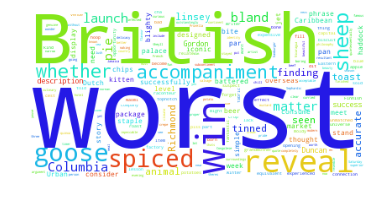

greek cuisine


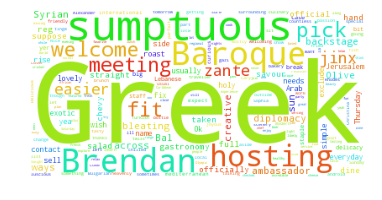

filipino cuisine


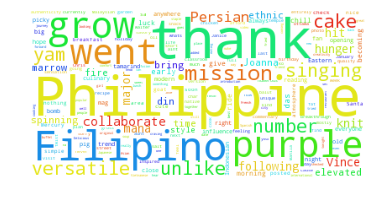

japanese cuisine


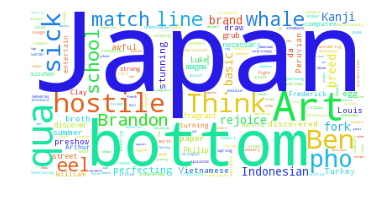

korean cuisine


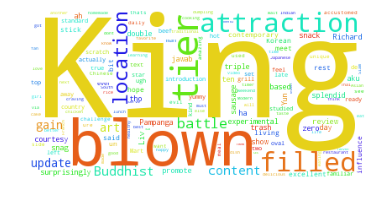

moroccan cuisine


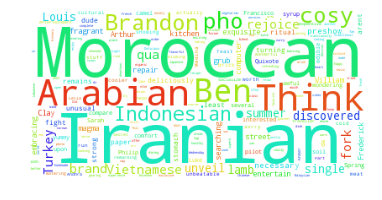

spanish cuisine


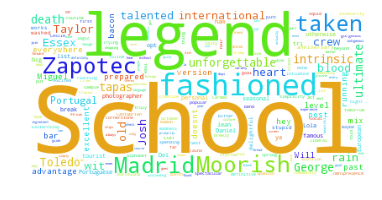

cajun creole cuisine


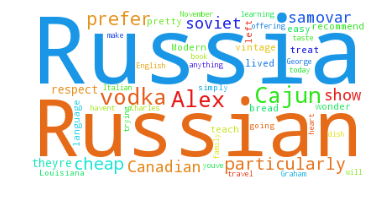

american cuisine


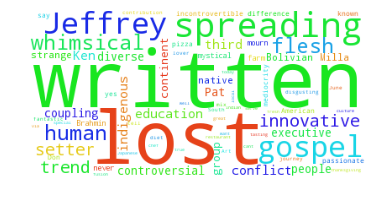

thai cuisine


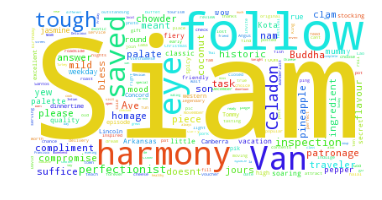

indian cuisine


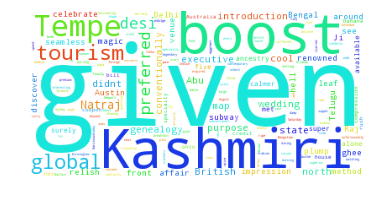

russian cuisine


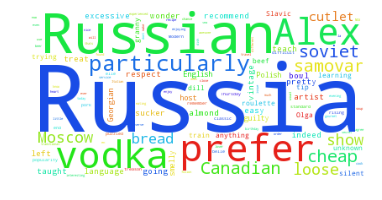

In [61]:
from scipy.misc import imread
%matplotlib inline

#plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
#Call WordCloud function
Branch_WordCloud_mask(long_string_x_cui,data_tokens.keys())